# Pouvoir d’arrêt collisionnel des protons
## 1.
Typiquement, la plus grande énergie utilisée dans les centres de photonthérapie est de 230 MeV.

L'énergie totale d'un corps s'écrit $E=\gamma mc^2$ alors que l'énergie de repos s'écrit $E_0=mc^2$, donc l'énergie cinétique est $T=E-E_0=(\gamma-1)mc^2$. En inversant cette équation, on obtient $$\boxed{\gamma=\frac{T}{mc^2}+1}$$ Par leur définition, $\beta=\frac{v}{c}$ et $\gamma=\frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$. Par substitution, on voit que $$\boxed{\gamma=\frac{1}{\sqrt{1-\beta^2}}}\quad\text{et}\quad\boxed{\beta=\sqrt{1-\frac{1}{\gamma^2}}}$$

## 2.
La densité électronique ($n_e$) est le nombre d'électrons par unité de volume, ce qui correspond à la somme des densités atomiques des différents éléments du matériau multipliées par leur nombre de proton ($Z$) par atome correspondant (en présumant que le matériau est électriquement neutre). La densité atomique d'un élément correspond à la densité massique du matériau ($\rho$) en grammes par cm$^3$ multipliée par la fraction de la masse du matériau appartenant à l'élément ($\xi$) divisée par la masse atomique de l'élément ($m_Z$) en grammes par mole, le tout multiplié par le nombre d'Avogadro ($N_o$) pour que les grammes par moles deviennent des grammes par atome. Autrement dit, $$n_e=\rho N_A\sum_{Z=1}^\infty\frac{Z\xi_Z}{m_Z}$$

In [2]:
def densite_elec_massique(masses_materiau, masses_atomiques, dens_masse, avogadro):
    densite = 0
    for i in masses_materiau:
        densite += i * masses_materiau[i] / masses_atomiques[i]
    densite = densite * avogadro * dens_masse
    return densite


avogadro = 6.022 * 10 ** 23
masses_atomiques = {
    1: 1.0079,
    6: 12.0107,
    7: 14.0067,
    8: 15.9994,
    12: 24.305,
    15: 30.9738,
    16: 32.065,
    20: 40.078,
    30: 65.39,
}


masses_eau = {1: 0.111894, 8: 0.888106}
masses_os = {
    1: 0.047234,
    6: 0.144330,
    7: 0.041990,
    8: 0.446096,
    12: 0.002200,
    15: 0.104970,
    16: 0.003150,
    20: 0.209930,
    30: 0.000100
}
dens_masse_os = 1.85
dens_masse_eau = 1


densite_elec_eau =  densite_elec_massique(masses_eau, masses_atomiques, dens_masse_eau, avogadro)
densite_elec_os = densite_elec_massique(masses_os, masses_atomiques, dens_masse_os, avogadro)


print("Densité électronique de l'eau: {0} électrons par cm^3\n".format(densite_elec_eau))
print("Densité électronique de l'os cortical: {0} électrons par cm^3".format(densite_elec_os))

Densité électronique de l'eau: 3.342731617093692e+23 électrons par cm^3

Densité électronique de l'os cortical: 5.807706023151945e+23 électrons par cm^3


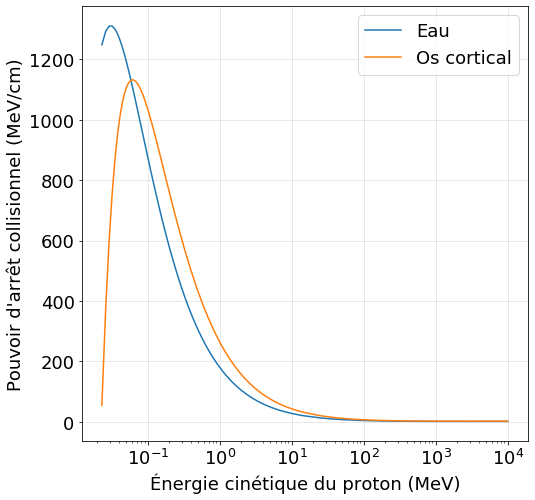

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def pouvoir(energie, dens, re, me, Tmax, betac, gammac):
    '''Approximation du pouvoir d'arrêt en fonction de l'énergie cinétique'''
    coefficient = lambda T : 2 * np.pi * re ** 2 * me * dens / betac(T)
    log_argument = lambda T : 2 * me * betac(T) * gammac(T) * Tmax / energie ** 2
    Scol = lambda T : coefficient(T) * (np.log(log_argument(T)) - 2 * betac(T))
    return Scol


re = 2.82 * 10 ** -13  # Rayon classique de l'électron (cm)
me = 0.511  # Masse classique de l'électron multipliée par c^2 (MeV)
Tmax = 230  # Énergie cinétique maximale (MeV)
mp = 938  # Masse classique du proton multipliée par c^2 (MeV)
gammac = lambda T : (T / mp + 1) ** 2  # Gamma au carré (-)
betac = lambda T : 1 - 1 / gammac(T)  # Beta au carré (-)


energie_eau = 75 * 10 ** -3  # Énergies d'excitation moyenne (MeV)
energie_os = 106.4 * 10 ** -3


Scol_eau = np.vectorize(pouvoir(energie_eau, densite_elec_eau, re, me, Tmax, betac, gammac))
Scol_os = np.vectorize(pouvoir(energie_os, densite_elec_os, re, me, Tmax, betac, gammac))


axis = np.linspace(0.023, 15, 5000)
axis = np.append(axis, np.linspace(15.1, 10 ** 4, 1000))
plt.figure(figsize=(8, 8))
graph = plt.plot(axis, Scol_eau(axis), axis, Scol_os(axis))
plt.legend(('Eau', 'Os cortical'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt collisionnel (MeV/cm)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.35)

# Portée des protons dans la matière
